In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#import ml_insights as mli

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

## Load the Data, Examine and Explore

Data was stored in separately csvs for every 100 listings as a precaution during scrapping.

I concatenate the csvs into one dataframe.

In [3]:
df_list = []
for csv in np.arange(100,65300,100):
    df_ind = pd.read_csv("/Users/vickyclayton/Google Drive/Documents/Of interest/Data Science/Bootcamp/Metis/metisgh/Class Lectures/Week 2/Craigs_list_{0}.csv".format(csv))
    df_list.append(df_ind)
df_cat = pd.concat(df_list, ignore_index = True)

In [4]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65200 entries, 0 to 65199
Data columns (total 22 columns):
<b>2005_Prerunner_trd:            1 non-null object
<b>2013_Hyundai_Elantra_(Stk_#    1 non-null object
<b>2017_Volkswagen_Golf__GTI_S    1 non-null object
URL                               65200 non-null object
Unnamed: 0                        65200 non-null int64
VIN                               18315 non-null object
VIN:_<b>                          1 non-null object
VIN:_<b>Ctrjjv2568                1 non-null object
VIN:_<b>VIN                       2 non-null object
VIN:_<b>Vin#                      1 non-null object
condition                         38102 non-null object
cylinders                         38718 non-null object
disabled                          65200 non-null object
drive                             35861 non-null object
fuel                              64890 non-null object
odometer                          42681 non-null object
paint_color             

Pricing data was stored separately (I forgot to scrape it initially!) So I merge the dataframes here.

In [5]:
df_price_list = []
for csv in np.arange(100,80800,100):
    df_ind = pd.read_csv("/Users/vickyclayton/Google Drive/Documents/Of interest/Data Science/Bootcamp/Metis/metisgh/Class Lectures/Week 2/Craigs_list_price_{0}.csv".format(csv))
    df_price_list.append(df_ind)
df_price = pd.concat(df_price_list, ignore_index = True)

In [6]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80700 entries, 0 to 80699
Data columns (total 3 columns):
Unnamed: 0    80700 non-null int64
Price         80700 non-null object
URL           80700 non-null object
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [7]:
df_price.head()

,Unnamed: 0,Price,URL
0,0,$2500,https://modesto.craigslist.org/cto/d/2004-mits...
1,1,$5300,https://sfbay.craigslist.org/eby/cto/d/2004-ho...
2,2,$13500,https://tuscaloosa.craigslist.org/cto/d/2002-g...
3,3,$10800,https://mohave.craigslist.org/cto/d/gmc-acadia...
4,4,$6200,https://bakersfield.craigslist.org/cto/d/2002-...


In [8]:
df_cg_j = pd.merge(df_cat, df_price, on='URL')
df_cg_j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67367 entries, 0 to 67366
Data columns (total 24 columns):
<b>2005_Prerunner_trd:            1 non-null object
<b>2013_Hyundai_Elantra_(Stk_#    1 non-null object
<b>2017_Volkswagen_Golf__GTI_S    1 non-null object
URL                               67367 non-null object
Unnamed: 0_x                      67367 non-null int64
VIN                               19493 non-null object
VIN:_<b>                          1 non-null object
VIN:_<b>Ctrjjv2568                1 non-null object
VIN:_<b>VIN                       2 non-null object
VIN:_<b>Vin#                      0 non-null object
condition                         39193 non-null object
cylinders                         39939 non-null object
disabled                          67367 non-null object
drive                             37287 non-null object
fuel                              67032 non-null object
odometer                          44238 non-null object
paint_color             

In [9]:
df_cg_j.head()

,<b>2005_Prerunner_trd:,<b>2013_Hyundai_Elantra_(Stk_#,<b>2017_Volkswagen_Golf__GTI_S,URL,Unnamed: 0_x,VIN,VIN:_<b>,VIN:_<b>Ctrjjv2568,VIN:_<b>VIN,VIN:_<b>Vin#,...,fuel,odometer,paint_color,size,title,title_status,transmission,type,Unnamed: 0_y,Price
0,NaN,NaN,NaN,https://modesto.craigslist.org/cto/d/2004-mits...,0,NaN,NaN,NaN,NaN,NaN,...,gas,NaN,silver,NaN,2004_mitsubishi_diamante,clean,automatic,NaN,0,$2500
1,NaN,NaN,NaN,https://sfbay.craigslist.org/eby/cto/d/2004-ho...,1,NaN,NaN,NaN,NaN,NaN,...,gas,125000,grey,full-size,2004_Honda_Accord_ex,clean,manual,sedan,1,$5300
2,NaN,NaN,NaN,https://tuscaloosa.craigslist.org/cto/d/2002-g...,2,NaN,NaN,NaN,NaN,NaN,...,gas,163000,NaN,NaN,2002_GMC_1500_HD,clean,automatic,NaN,2,$13500
3,NaN,NaN,NaN,https://mohave.craigslist.org/cto/d/gmc-acadia...,3,NaN,NaN,NaN,NaN,NaN,...,gas,118000,silver,NaN,2011_acadia_gmc,clean,automatic,SUV,3,$10800
4,NaN,NaN,NaN,https://bakersfield.craigslist.org/cto/d/2002-...,4,NaN,NaN,NaN,NaN,NaN,...,gas,NaN,NaN,NaN,2002_Toyota,clean,automatic,NaN,4,$6200


I scrape data from 2 websites - Craigs List ('cg') and a specialist accessible vehicle company ('wh'). They list different features and so some of the cleaning is done separately. 'J' indicates the features shared between the two datasets.

In [10]:
'''
df.columns
df_wh = (df[['URL', 'VIN','condition', 'cylinders',
       'disabled', 'drive', 'fuel', 'odometer', 'paint_color', 'size', 'title',
       'title_status', 'transmission', 'type', 'Price']])
df_cg = (df[['condition', 'cylinders',
       'disabled', 'drive', 'fuel', 'odometer', 'paint_color', 'size', 'title',
       'title_status', 'transmission', 'type', 'Price']])
df_cg_j = (df[['URL','paint_color','odometer','title','title_status',
             'type', 'cylinders','condition', 'Price']])
'''

"\ndf.columns\ndf_wh = (df[['URL', 'VIN','condition', 'cylinders',\n       'disabled', 'drive', 'fuel', 'odometer', 'paint_color', 'size', 'title',\n       'title_status', 'transmission', 'type', 'Price']])\ndf_cg = (df[['condition', 'cylinders',\n       'disabled', 'drive', 'fuel', 'odometer', 'paint_color', 'size', 'title',\n       'title_status', 'transmission', 'type', 'Price']])\ndf_cg_j = (df[['URL','paint_color','odometer','title','title_status',\n             'type', 'cylinders','condition', 'Price']])\n"

Extracting the cylinder number

In [11]:
import re
print(df_cg_j.cylinders.value_counts())
cylinders_no = [re.search('([0-9]+)(_cylinders)', str(x)) for x in df_cg_j['cylinders']]
cylinders_no
cylinders_no_2 = []
for x in cylinders_no:
    try:
        cylinders_no_2.append(int(x.group(1)))
    except:
        cylinders_no_2.append(None)
df_cg_j['cylinders_no'] = cylinders_no_2
df_cg_j['cylinders_no'].value_counts()

6_cylinders     13175
8_cylinders     12555
4_cylinders     11652
other            1213
5_cylinders       412
10_cylinders      206
4wd               176
fwd               157
rwd               152
gas               119
3_cylinders        72
12_cylinders       47
diesel              3
Name: cylinders, dtype: int64


6.0     13175
8.0     12555
4.0     11652
5.0       412
10.0      206
3.0        72
12.0       47
Name: cylinders_no, dtype: int64

I was interested in being able to predict the price of cars that are actually drive-able and so I discard those marked as 'salvage'.

In [12]:
print(df_cg_j.condition.value_counts())
condition_dummies = pd.get_dummies(df_cg_j['condition'])
df_cg_j = pd.concat([df_cg_j, condition_dummies], axis=1)

# Get rid of salvage
df_cg_j.drop(df_cg_j[df_cg_j['salvage']==1].index, inplace = True)
print(df_cg_j['salvage'].value_counts())
df_cg_j.drop(['salvage'],axis = 1, inplace = True)

excellent    16781
good         13554
like_new      5337
fair          2692
new            475
salvage        354
Name: condition, dtype: int64
0    67013
Name: salvage, dtype: int64


I create dummies for the type of car.

In [13]:
print(df_cg_j['type'].value_counts())
type_dummies = pd.get_dummies(df_cg_j['type'])
df_cg_j = pd.concat([df_cg_j, type_dummies], axis=1)
df_cg_j.info()

sedan          9540
SUV            7628
truck          4730
pickup         4102
coupe          2874
hatchback      1320
convertible    1306
van             926
other           776
mini-van        728
wagon           672
offroad         363
bus              63
Name: type, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 67013 entries, 0 to 67366
Data columns (total 43 columns):
<b>2005_Prerunner_trd:            1 non-null object
<b>2013_Hyundai_Elantra_(Stk_#    1 non-null object
<b>2017_Volkswagen_Golf__GTI_S    1 non-null object
URL                               67013 non-null object
Unnamed: 0_x                      67013 non-null int64
VIN                               19430 non-null object
VIN:_<b>                          1 non-null object
VIN:_<b>Ctrjjv2568                1 non-null object
VIN:_<b>VIN                       2 non-null object
VIN:_<b>Vin#                      0 non-null object
condition                         38839 non-null object
cylinders          

I drop sedans, coupes, hatchbacks and convertibles becuase these cars are not very comparable to accessible vehicles (which is what I'm interested in).

In [14]:
cars_bad = ['sedan','coupe','hatchback','convertible']
df_cg_j.drop(cars_bad,axis=1, inplace = True)

I create dummies for the type of fuel, and restrict it to actual types of fuel (there is little quality control on what people enter into these categories on Craig's List).

In [15]:
df_cg_j['drive'] = df_cg_j['drive'].replace('diesel',np.NaN)
df_cg_j['drive'] = df_cg_j['drive'].replace('gas',np.NaN)
df_cg_j['drive'] = df_cg_j['drive'].replace('electric',np.NaN)
drive_dummies = pd.get_dummies(df_cg_j['drive'])
df_cg_j = pd.concat([df_cg_j, drive_dummies], axis=1)
df_cg_j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67013 entries, 0 to 67366
Data columns (total 43 columns):
<b>2005_Prerunner_trd:            1 non-null object
<b>2013_Hyundai_Elantra_(Stk_#    1 non-null object
<b>2017_Volkswagen_Golf__GTI_S    1 non-null object
URL                               67013 non-null object
Unnamed: 0_x                      67013 non-null int64
VIN                               19430 non-null object
VIN:_<b>                          1 non-null object
VIN:_<b>Ctrjjv2568                1 non-null object
VIN:_<b>VIN                       2 non-null object
VIN:_<b>Vin#                      0 non-null object
condition                         38839 non-null object
cylinders                         39644 non-null object
disabled                          67013 non-null object
drive                             36541 non-null object
fuel                              66678 non-null object
odometer                          44002 non-null object
paint_color             

In [16]:
print(df_cg_j['fuel'].value_counts())
fuel_good = ['gas','other','diesel','hybrid','electric','clean']
fuel_bad = set(list(df_cg_j.fuel)) - set(fuel_good)
for fuel in fuel_bad:
    df_cg_j['fuel'] = df_cg_j['fuel'].replace(fuel,np.NaN)
fuel_dummies = pd.get_dummies(df_cg_j['fuel'])
df_cg_j = pd.concat([df_cg_j, fuel_dummies], axis=1)
df_cg_j.info()

gas         59101
diesel       4203
other        1914
hybrid        548
electric      142
clean          59
silver         30
black          26
white          24
grey           19
blue           13
68000           9
red             9
200000          8
170000          7
120000          7
135000          7
140000          6
89000           6
180000          6
86000           6
130000          6
79000           6
175000          5
missing         5
121000          5
100000          5
custom          5
230000          5
150000          5
            ...  
122000          1
87000           1
151785          1
61271           1
77000           1
52200           1
93432           1
250000          1
purple          1
220549          1
137500          1
32455           1
73834           1
78123           1
89266           1
54504           1
220496          1
34000           1
172433          1
141000          1
143074          1
83382           1
184888          1
173152          1
254000    

Converting mileage to numeric. The max number is high and probably unlikely (because of it's magnitude and it's roundness). I visually explore the distribution later in the notebook to see whether I should exclude such suspicious values.

In [17]:
df_cg_j['odometer'] = pd.to_numeric(df_cg_j['odometer'], errors='coerce')
df_cg_j = df_cg_j.rename(index = str, columns={'odometer': 'mileage'})
df_cg_j['mileage'].describe() 

count    4.344300e+04
mean     1.166219e+05
std      1.984926e+05
min      0.000000e+00
25%      5.331250e+04
50%      1.045750e+05
75%      1.540000e+05
max      1.000000e+07
Name: mileage, dtype: float64

I restrict the colours to a smaller number.

In [18]:
print(df_cg_j['paint_color'].value_counts())
color_good = ['white','black','silver','grey','blue','red', 'green','brown','yellow','orange','purple']
color_bad = set(df_cg_j.paint_color) - set(color_good)
print(color_bad)
for color in color_bad:
    df_cg_j['paint_color'] = df_cg_j['paint_color'].replace(color,np.NaN)
paint_dummies = pd.get_dummies(df_cg_j['paint_color'])
df_cg_j = pd.concat([df_cg_j, paint_dummies], axis=1)

white          9758
black          6621
silver         5292
red            3874
grey           3758
blue           3668
green          1589
custom         1249
brown           999
yellow          449
orange          254
full-size       210
clean           172
purple          119
mid-size        116
compact          57
salvage           8
sub-compact       6
missing           2
rebuilt           1
Name: paint_color, dtype: int64
{nan, 'salvage', 'sub-compact', 'custom', 'full-size', 'mid-size', 'missing', 'clean', 'compact', 'rebuilt'}


Again, I restrict to sizes that are actually sizes.

In [19]:
print(df_cg_j['size'].value_counts())
size_good = ['full-size','mid-size','compact','sub-compact']
size_bad = set(list(df_cg_j['size'])) - set(size_good)
print(size_bad)
for size in size_bad:
    df_cg_j['size'] = df_cg_j['size'].replace(size,np.NaN)
size_dummies = pd.get_dummies(df_cg_j['size']).head(5)
df_cg_j = pd.concat([df_cg_j, size_dummies], axis=1)

full-size      11386
mid-size        5835
compact         3720
clean            374
sub-compact      336
salvage           15
rebuilt            9
lien               5
parts_only         1
missing            1
Name: size, dtype: int64
{nan, 'salvage', 'lien', 'missing', 'clean', 'rebuilt', 'parts_only'}


In [20]:
df_cg_j.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67013 entries, 0 to 9999
Data columns (total 64 columns):
<b>2005_Prerunner_trd:            1 non-null object
<b>2013_Hyundai_Elantra_(Stk_#    1 non-null object
<b>2017_Volkswagen_Golf__GTI_S    1 non-null object
URL                               67013 non-null object
Unnamed: 0_x                      67013 non-null int64
VIN                               19430 non-null object
VIN:_<b>                          1 non-null object
VIN:_<b>Ctrjjv2568                1 non-null object
VIN:_<b>VIN                       2 non-null object
VIN:_<b>Vin#                      0 non-null object
condition                         38839 non-null object
cylinders                         39644 non-null object
disabled                          67013 non-null object
drive                             36541 non-null object
fuel                              65967 non-null object
mileage                           43443 non-null float64
paint_color                  

Keep only titles that are clean since I would like to focus on cars that are driveable.

In [21]:
print(df_cg_j['title_status'].value_counts())
df_cg_j.drop(df_cg_j[df_cg_j.title_status != 'clean'].index, inplace=True)

df_cg_j.title_status.value_counts()

clean         60100
salvage        3095
rebuilt        1357
lien            791
automatic       626
missing         576
parts_only      309
manual          131
other            13
Name: title_status, dtype: int64


clean    60100
Name: title_status, dtype: int64

I drop other types of transmission as I wasn't sure what it meant.

In [22]:
print(df_cg_j['transmission'].value_counts())
trans_good = ['automatic','manual']
trans_bad = set(list(df_cg_j['transmission'])) - set(trans_good)
print(trans_bad)
for trans in trans_bad:
    df_cg_j['transmission'] = df_cg_j['transmission'].replace(trans,np.NaN)
transmission_dummies = pd.get_dummies(df_cg_j['transmission'])
df_cg_j = pd.concat([df_cg_j, transmission_dummies], axis=1)

df_cg_j.info()

automatic    50897
manual        7857
other         1191
Name: transmission, dtype: int64
{nan, 'other'}
<class 'pandas.core.frame.DataFrame'>
Index: 60100 entries, 0 to 9999
Data columns (total 66 columns):
<b>2005_Prerunner_trd:            1 non-null object
<b>2013_Hyundai_Elantra_(Stk_#    1 non-null object
<b>2017_Volkswagen_Golf__GTI_S    0 non-null object
URL                               60100 non-null object
Unnamed: 0_x                      60100 non-null int64
VIN                               18671 non-null object
VIN:_<b>                          1 non-null object
VIN:_<b>Ctrjjv2568                1 non-null object
VIN:_<b>VIN                       1 non-null object
VIN:_<b>Vin#                      0 non-null object
condition                         34499 non-null object
cylinders                         35434 non-null object
disabled                          60100 non-null object
drive                             33586 non-null object
fuel                              597

I extract the brand and model of the vehicle from the title of the listing using regular expressions.

In [23]:
print(df_cg_j['title'].head())
df_cg_j['title'] = [str(x).replace('_',' ') for x in df_cg_j['title']]
title = [re.search('([0-9]{4}) (\w+) (\w+)', str(x)) for x in df_cg_j['title']]
df_cg_j[['year','brand_company']] = df_cg_j['title'].str.extract('([0-9]{4}) (\w+)', expand=True)
df_cg_j['year'] = pd.to_numeric(df_cg_j['year'])
df_cg_j['brand_company'] = [str(x).lower() for x in df_cg_j['brand_company']]
df_cg_j.loc[df_cg_j.groupby('brand_company').brand_company.transform('count').lt(100), 'brand_company'] = np.nan  
print(df_cg_j['brand_company'].value_counts())
brand_dummies = pd.get_dummies(df_cg_j['brand_company'])
df_cg_j = pd.concat([df_cg_j, brand_dummies], axis=1)

0            2004_mitsubishi_diamante
1                2004_Honda_Accord_ex
10       1999_International_4700_T44E
1000                  2006_honda_cr-v
10000                2017_Honda_Civic
Name: title, dtype: object
ford             9484
chevrolet        5499
toyota           5211
dodge            3654
honda            3544
chevy            3511
nissan           3162
gmc              2432
jeep             2289
bmw              1907
mercedes         1266
chrysler          942
hyundai           922
lexus             863
volkswagen        861
kia               860
cadillac          755
mazda             687
acura             621
subaru            614
buick             565
pontiac           557
vw                514
ram               493
audi              435
lincoln           427
volvo             397
infiniti          354
saturn            308
mitsubishi        296
mercury           285
mini              269
scion             237
jaguar            205
porsche           203
land         

In [25]:
df_cg_j.head()

,<b>2005_Prerunner_trd:,<b>2013_Hyundai_Elantra_(Stk_#,<b>2017_Volkswagen_Golf__GTI_S,URL,Unnamed: 0_x,VIN,VIN:_<b>,VIN:_<b>Ctrjjv2568,VIN:_<b>VIN,VIN:_<b>Vin#,...,porsche,ram,saturn,scion,subaru,suzuki,toyota,volkswagen,volvo,vw
0,NaN,NaN,NaN,https://modesto.craigslist.org/cto/d/2004-mits...,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,https://sfbay.craigslist.org/eby/cto/d/2004-ho...,1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
10,NaN,NaN,NaN,https://sfbay.craigslist.org/sby/ctd/d/interna...,10,1HTSMABK4XH687208,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1000,NaN,NaN,NaN,https://mobile.craigslist.org/cto/d/honda-cr-2...,66,JHLRD685X6C009930,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
10000,NaN,NaN,NaN,https://santamaria.craigslist.org/ctd/d/2017-h...,24,19XFC2F70HE222168,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


I extract the year. I limit it to 1901 and later as there are quite a few vehicles listed as 1900 but which are unlikely.

In [26]:
df_cg_j.describe()
df_cg_j.sort_values(by = ['year'])[['year','URL']].head(20)
df_cg_j.loc[df_cg_j['year'].lt(1901), 'year'] = np.nan  

In [27]:
df_cg_j.drop(['<b>2017_Volkswagen_Golf__GTI_S', 'Unnamed: 0','VIN:_<b>','VIN:_<b>VIN', 'VIN:_<b>Vin#'],axis=1, inplace = True)

In [28]:
df_cg_j['Price'].head()

0         $2500
1         $5300
10       $19500
1000      $4500
10000    $21515
Name: Price, dtype: object

Cleaning Price to get rid of the currency sign.

In [29]:
df_cg_j['Price'] = [x.replace('$','') for x in df_cg_j['Price']]
df_cg_j['Price'] = [int(x) for x in df_cg_j['Price']]

In [30]:
df_cg_j.columns

Index(['<b>2005_Prerunner_trd:', '<b>2013_Hyundai_Elantra_(Stk_#', 'URL',
       'Unnamed: 0_x', 'VIN', 'VIN:_<b>Ctrjjv2568', 'condition', 'cylinders',
       'disabled', 'drive',
       ...
       'porsche', 'ram', 'saturn', 'scion', 'subaru', 'suzuki', 'toyota',
       'volkswagen', 'volvo', 'vw'],
      dtype='object', length=107)

In [31]:
df_cg_j.head()

,<b>2005_Prerunner_trd:,<b>2013_Hyundai_Elantra_(Stk_#,URL,Unnamed: 0_x,VIN,VIN:_<b>Ctrjjv2568,condition,cylinders,disabled,drive,...,porsche,ram,saturn,scion,subaru,suzuki,toyota,volkswagen,volvo,vw
0,NaN,NaN,https://modesto.craigslist.org/cto/d/2004-mits...,0,NaN,NaN,good,6_cylinders,No,NaN,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,https://sfbay.craigslist.org/eby/cto/d/2004-ho...,1,NaN,NaN,excellent,4_cylinders,No,fwd,...,0,0,0,0,0,0,0,0,0,0
10,NaN,NaN,https://sfbay.craigslist.org/sby/ctd/d/interna...,10,1HTSMABK4XH687208,NaN,NaN,8_cylinders,No,rwd,...,0,0,0,0,0,0,0,0,0,0
1000,NaN,NaN,https://mobile.craigslist.org/cto/d/honda-cr-2...,66,JHLRD685X6C009930,NaN,good,4_cylinders,No,fwd,...,0,0,0,0,0,0,0,0,0,0
10000,NaN,NaN,https://santamaria.craigslist.org/ctd/d/2017-h...,24,19XFC2F70HE222168,NaN,NaN,other,No,NaN,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_cg_j.to_csv('Craigs_list_all.csv')

** Bringing in specialist accessible vehicle company data **

I also scrapped the website of a company which specialises in accessible vehicles.

In [33]:
'''
df_mb_list = []
for csv in np.arange(100,500,100):
    df_ind = pd.read_csv("/Users/vickyclayton/Google Drive/Documents/Of interest/Data Science/Bootcamp/Metis/metisgh/Class Lectures/Week 2/Mobility_Works_{0}.csv".format(csv))
    df_mb_list.append(df_ind)
df_mb = pd.concat(df_mb_list, ignore_index = True)
'''
df_mb = pd.read_csv("/Users/vickyclayton/Google Drive/Documents/Of interest/Data Science/Bootcamp/Metis/metisgh/Class Lectures/Week 2/Mobility_Works_all.csv")

In [34]:
df_mb.columns

Index(['Unnamed: 0', 'Color', 'Conv Make', 'Conversion', 'Conversion Make',
       'Conversion Model', 'Engine Size', 'Entry Location', 'Entry Operation',
       'Entry Type', 'Exterior Color', 'Interior Color', 'Location',
       'MPG (City/Hwy)', 'Make', 'Mileage', 'Model', 'Price', 'Stock', 'Trim',
       'Type', 'URL', 'VIN', 'Year', 'images'],
      dtype='object')

I make sure the names correspond to the Craigs List data.

In [35]:
df_mb = (df_mb.rename(index = str, 
                      columns={'Mileage': 'mileage',
                               'Exterior Color': 'paint_color',
                               'Year': 'year', 
                               'Engine Size': 'cylinder_no',
                              'Make': 'brand',
                              'Type': 'condition'}))

In [36]:
df_mb.paint_color.value_counts()

WHITE                      84
SILVER                     57
BILLET SILVER              54
GRANITE                    44
RED                        34
BLACK                      33
BLUE                       30
BRIGHT WHITE               24
SILVER SKY                 19
SUPER WHITE                15
VELVET RED                 14
GOLD                       13
DEEP CHERRY RED            13
WHITE KNUCKLE              12
GREEN                      12
DARK CORDOVAN              11
PREDAWN GRAY               11
CASHMERE                   10
SHORELINE BLUE              9
SKY BLUE                    8
OCTANE RED                  8
BRILLIANT BLACK             8
LUNAR SILVER                8
GRAY                        7
CRYSTAL BLACK               6
JAZZ BLUE                   6
CONTUSION BLUE              6
STONE WHITE                 6
MOLTEN SILVER               6
WHITE DIAMOND               6
                           ..
TEAL                        2
CASHMERE PEARL              2
DARK CHARC

I make the colours more recognisable!

In [37]:
df_mb['paint_color'].value_counts()
colors = ['WHITE','GRAY','RED','GREEN','BLUE','GOLD','BLACK','PURPLE','ORANGE','YELLOW', 'SILVER']

for color in colors:
    df_mb['paint_color'] = df_mb['paint_color'].apply(lambda x: color if color in x else x)

df_mb['paint_color'] = df_mb['paint_color'].apply(lambda x: 'GRAY' if 'GRANITE' in x else x) 
df_mb['paint_color'] = df_mb['paint_color'].apply(lambda x: 'GRAY' if 'GREY' in x else x)
df_mb['paint_color'] = df_mb['paint_color'].apply(lambda x: 'GRAY' if 'STEEL' in x else x)  
df_mb['paint_color'] = df_mb['paint_color'].apply(lambda x: 'RED' if 'DARK CHERRY' in x else x)
df_mb['paint_color'] = df_mb['paint_color'].apply(lambda x: 'RED' if 'DARK CORDOVAN' in x else x)
df_mb['paint_color'] = df_mb['paint_color'].apply(lambda x: 'CREAM' if 'PEARL' in x else x)
df_mb['paint_color'] = df_mb['paint_color'].apply(lambda x: 'CREAM' if 'CREME' in x else x)
df_mb['paint_color'] = df_mb['paint_color'].apply(lambda x: 'CREAM' if 'BEIGE' in x else x)
df_mb['paint_color'] = df_mb['paint_color'].apply(lambda x: 'CREAM' if 'MOCHA' in x else x)
df_mb['paint_color'] = df_mb['paint_color'].apply(lambda x: 'CREAM' if 'CASHMERE' in x else x)
df_mb['paint_color'] = [x.lower() for x in df_mb['paint_color']]
df_mb.loc[df_mb.groupby('paint_color').paint_color.transform('count').lt(10), 'paint_color'] = np.nan
df_mb = pd.concat([df_mb, pd.get_dummies(df_mb['paint_color'])], axis=1)

In [38]:
df_mb.columns

Index(['Unnamed: 0', 'Color', 'Conv Make', 'Conversion', 'Conversion Make',
       'Conversion Model', 'cylinder_no', 'Entry Location', 'Entry Operation',
       'Entry Type', 'paint_color', 'Interior Color', 'Location',
       'MPG (City/Hwy)', 'brand', 'mileage', 'Model', 'Price', 'Stock', 'Trim',
       'condition', 'URL', 'VIN', 'year', 'images', 'black', 'blue', 'cream',
       'gold', 'gray', 'green', 'red', 'silver', 'white'],
      dtype='object')

I extract brand and condition, and label all the vehicles in this dataset as accessible.

In [39]:
df_mb['brand'] = [x.lower() for x in df_mb['brand']]
df_mb = pd.concat([df_mb, pd.get_dummies(df_mb['brand'])], axis=1)

In [40]:
df_mb['condition'] = [x.lower() for x in df_mb['condition']]
df_mb = pd.concat([df_mb, pd.get_dummies(df_mb['condition'])], axis=1)

In [41]:
# make disabled column all yeses
df_mb['disabled'] = 1

In [42]:
df_mb['Location']

0              Saginaw MI 48609
1           Plainfield IL 60585
2          Chattanooga TN 37421
3           Sacramento CA 95827
4              La Mesa CA 91942
5                 Waco TX 76710
6               Toledo OH 43612
7          Tallahassee FL 32303
8      Madison Heights MI 48071
9             Van Nuys CA 91405
10          Burlingame CA 94010
11         Chattanooga TN 37421
12            Mesquite TX 75150
13     Madison Heights MI 48071
14           La Vergne TN 37086
15                Waco TX 76710
16            Van Nuys CA 91405
17               Selma TX 78154
18            Mesquite TX 75150
19              Fresno CA 93701
20              Toledo OH 43612
21            Bessemer AL 35022
22            Waukesha WI 53186
23            Van Nuys CA 91405
24         Santa Clara CA 95054
25           Riverside CA 92504
26               Selma TX 78154
27         San Antonio TX 78249
28                Buda TX 78610
29          Sacramento CA 95827
                 ...           
635     

I extract the city to control for location.

In [43]:
city= list(range(0,len(df_mb['Location'])))
df_mb[['state','postcode']] = df_mb['Location'].str.extract('\s(\w{2})\s([0-9]+)', expand=True)
for x in range(0,len(df_mb['Location'])):
    state = df_mb['state'][x]
    city[x] = df_mb['Location'][x].replace(str(state), '')
df_mb['city'] = city
df_mb['city'] = df_mb['city'].str.extract('([a-zA-z ]+)', expand=True)
df_mb['city'].value_counts()

Akron                35
Niles                34
Villa Park           31
Plainfield           31
Marietta             31
Madison Heights      30
Chattanooga          26
Fort Worth           26
Toledo               26
Sacramento           25
Mesquite             23
Cincinnati           23
Selma                23
Buda                 22
Waco                 22
Atlanta              22
La Vergne            22
San Antonio          21
Van Nuys             18
Saginaw              17
Oakland              16
La Mesa              16
Waukesha             15
Huntsville           14
Pasadena             14
Gallatin             12
Bessemer             12
Santa Clara          11
Tallahassee           9
Fresno                9
Riverside             9
Las Vegas             8
Chico                 4
Burlingame            4
Los Angeles           3
Gray ME               1
Name: city, dtype: int64

In [44]:
df_mb['Model'] = [str(x).lower() for x in df_mb['Model']]
df_mb['Model'] = [x.split(' - ')[0] for x in df_mb['Model']]
df_mb.loc[df_mb.groupby('Model').Model.transform('count').lt(50), 'Model'] = np.nan  
df_mb = pd.concat([df_mb, pd.get_dummies(df_mb['Model'])], axis=1)
print(df_mb['Model'].value_counts())

grand caravan       316
sienna              100
pacifica             81
odyssey              65
town and country     54
Name: Model, dtype: int64


In [45]:
df_mb.drop('Unnamed: 0', axis=1, inplace = True)

In [46]:
df_mb.columns

Index(['Color', 'Conv Make', 'Conversion', 'Conversion Make',
       'Conversion Model', 'cylinder_no', 'Entry Location', 'Entry Operation',
       'Entry Type', 'paint_color', 'Interior Color', 'Location',
       'MPG (City/Hwy)', 'brand', 'mileage', 'Model', 'Price', 'Stock', 'Trim',
       'condition', 'URL', 'VIN', 'year', 'images', 'black', 'blue', 'cream',
       'gold', 'gray', 'green', 'red', 'silver', 'white', 'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'mercedes-benz',
       'mobility ventures', 'pontiac', 'ram', 'toyota', 'new', 'new/used',
       'used', 'disabled', 'state', 'postcode', 'city', 'grand caravan',
       'odyssey', 'pacifica', 'sienna', 'town and country'],
      dtype='object')

Since there is limited variation in the title of the listing, I use the URL as a unique identifier. 

In [47]:
df_mb = df_mb.set_index('URL')
df_mb.head()

,Color,Conv Make,Conversion,Conversion Make,Conversion Model,cylinder_no,Entry Location,Entry Operation,Entry Type,paint_color,...,used,disabled,state,postcode,city,grand caravan,odyssey,pacifica,sienna,town and country
URL,,,,,,,,,,,,,,,,,,,,,
https://www.mobilityworks.com/wheelchair-vans-for-sale/2011-dodge-grand-caravan-braunability-2d4rn3dg9br646408/,NaN,NaN,NaN,BraunAbility,Braun XT,NaN,Side Entry,Automatic,Fold Out,red,...,1,1,MI,48609,Saginaw,1,0,0,0,0
https://www.mobilityworks.com/wheelchair-vans-for-sale/2011-honda-odyssey-vmi-5fnrl5h41bb063602-2/#vehiclebadgedetail,NaN,NaN,NaN,VMI,VMI Northstar,NaN,Side Entry,Automatic,In Floor,red,...,1,1,IL,60585,Plainfield,0,1,0,0,0
https://www.mobilityworks.com/wheelchair-vans-for-sale/2011-honda-odyssey-vmi-5fnrl5h63bb053767/,NaN,NaN,NaN,VMI,VMI Northstar,NaN,Side Entry,Automatic,In Floor,cream,...,1,1,TN,37421,Chattanooga,0,1,0,0,0
https://www.mobilityworks.com/wheelchair-vans-for-sale/2006-chrysler-town-and-country-vmi-2a4gp44r06r615408/,NaN,NaN,NaN,VMI,VMI Northstar,NaN,Side Entry,Automatic,In Floor,white,...,1,1,CA,95827,Sacramento,0,0,0,0,1
https://www.mobilityworks.com/wheelchair-vans-for-sale/2015-toyota-sienna-vmi-5tdxk3dc5fs600212/,NaN,NaN,NaN,VMI,VMI Northstar,NaN,Side Entry,Automatic,In Floor,silver,...,1,1,CA,91942,La Mesa,0,0,0,1,0


In [48]:
# For Wheelable
df_mb_w = (df_mb[['Conv Make', 'Conversion', 'Conversion Make',
       'Conversion Model', 'cylinder_no', 'Entry Location', 'Entry Operation',
       'Entry Type', 'paint_color', 'Interior Color',
       'MPG (City/Hwy)', 'brand', 'mileage', 'Model', 'Price', 'Stock', 'Trim',
       'condition', 'VIN', 'year', 'state', 'postcode', 'city']])

In [49]:
# Would require additional cleaning to model separately
df_mb_i = (df_mb[['Color', 'Conv Make', 'Conversion', 'Conversion Make',
       'Conversion Model', 'cylinder_no', 'Entry Location', 'Entry Operation',
       'Entry Type', 'Interior Color',
       'MPG (City/Hwy)', 'mileage', 'Model', 'Price', 'Stock', 'Trim',
        'year', 'state', 'postcode', 'city']])

In [50]:
# For combining with CG
df_mb_j = (df_mb[['cylinder_no', 'mileage', 'year', 'black', 
        'blue', 'cream', 'gold',
       'gray', 'green', 'red', 'silver', 'white', 'chevrolet', 'chrysler',
       'dodge', 'ford', 'honda', 'mercedes-benz', 'mobility ventures',
       'pontiac', 'ram', 'toyota', 'new', 'new/used', 'used', 'disabled',
       'state', 'postcode', 'city', 'grand caravan', 'odyssey', 'pacifica',
       'sienna', 'town and country']])

 ** Merging Data Together **

In [51]:
df_cg_j = df_cg_j.set_index('URL')

In [52]:
df_cg_j.drop(['<b>2005_Prerunner_trd:', '<b>2013_Hyundai_Elantra_(Stk_#',
       'Unnamed: 0_x', 'VIN:_<b>Ctrjjv2568'], axis=1, inplace = True)

In [53]:
df_cg_j.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60100 entries, https://modesto.craigslist.org/cto/d/2004-mitsubishi-diamante/6474977939.html to https://shoals.craigslist.org/cto/d/ford-150/6470103745.html
Columns: 102 entries, VIN to vw
dtypes: float64(7), int64(2), object(13), uint8(80)
memory usage: 15.1+ MB


All desired features

In [54]:
df_cg_w = (df_cg_j[['VIN', 'condition', 'type','cylinders', 'disabled', 'drive', 'fuel',
       'mileage', 'paint_color', 'size', 'transmission','brand_company']])
df_cg_w['URL'] = df_cg_w.index

/Users/vickyclayton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [55]:
# For modelling separately
df_cg_i = (df_cg_j.drop(['URL', 'VIN', 'condition', 
            'type','cylinders', 'disabled', 'drive', 'fuel',
           'mileage', 'paint_color', 'size', 'transmission',
            'brand_company'],axis = 1))

For combined modelling
Also need to drop the dummies for the columns not in MW

In [56]:
from functools import reduce


to_drop = ['URL', 'VIN', 'condition', 
            'type','cylinders', 'disabled', 'drive', 'fuel',
            'paint_color', 'size', 'transmission']
dum_list = [type_dummies, drive_dummies, fuel_dummies, size_dummies, transmission_dummies]
dummies_list_all = reduce(lambda left,right: left.join(right, lsuffix='_left', rsuffix='_right'), dum_list)
dummies_list = dummies_list_all.columns.values.tolist()
print(dummies_list)
remove_list = ['other_left', 'hybrid_left', 'hybrid_right', 'other_right']
for rem in remove_list:
    dummies_list_2 = dummies_list.remove(rem)
to_drop.extend(dummies_list)
print(to_drop)
df_cg_c = (df_cg_j.drop(to_drop,axis = 1))

['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van', 'offroad', 'other_left', 'pickup', 'sedan', 'truck', 'van', 'wagon', '4wd', 'fwd', 'hybrid_left', 'rwd', 'clean', 'diesel', 'electric', 'gas', 'hybrid_right', 'other_right', 'compact', 'full-size', 'mid-size', 'sub-compact', 'automatic', 'manual']
['URL', 'VIN', 'condition', 'type', 'cylinders', 'disabled', 'drive', 'fuel', 'paint_color', 'size', 'transmission', 'SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van', 'offroad', 'pickup', 'sedan', 'truck', 'van', 'wagon', '4wd', 'fwd', 'rwd', 'clean', 'diesel', 'electric', 'gas', 'compact', 'full-size', 'mid-size', 'sub-compact', 'automatic', 'manual']


In [57]:
from collections import Counter
duplicates = [c for c in Counter(df_cg_j.columns).items() if c[1] > 1]
print(duplicates)
df_cg_j = df_cg_j.loc[:,~df_cg_j.columns.duplicated()]

[('other', 2), ('hybrid', 2)]


Starting with a basic model (price, mileage, year)

Need to drop NAs

In [58]:
df_basic = df_cg_j.loc[:,['Price','mileage','year']]
dummies = [list(type_dummies), list(condition_dummies), list(paint_dummies), list(brand_dummies)]
for dum in dummies:
    df_cg_dum = df_cg_j.loc[:,dum]
    df_basic = pd.concat([df_basic,df_cg_dum], axis = 1)
df_basic.dropna(axis=1, how='all', inplace = True)
df_basic.dropna(axis=0, how='any', inplace = True)
df_basic.info()

/Users/vickyclayton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
/Users/vickyclayton/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<class 'pandas.core.frame.DataFrame'>
Index: 39775 entries, https://sfbay.craigslist.org/eby/cto/d/2004-honda-accord-5-speed-ex/6477527433.html to https://shoals.craigslist.org/cto/d/ford-150/6470103745.html
Data columns (total 71 columns):
Price            39775 non-null int64
mileage          39775 non-null float64
year             39775 non-null float64
SUV              39775 non-null uint8
bus              39775 non-null uint8
mini-van         39775 non-null uint8
offroad          39775 non-null uint8
other            39775 non-null uint8
pickup           39775 non-null uint8
truck            39775 non-null uint8
van              39775 non-null uint8
wagon            39775 non-null uint8
excellent        39775 non-null uint8
fair             39775 non-null uint8
good             39775 non-null uint8
like_new         39775 non-null uint8
new              39775 non-null uint8
black            39775 non-null uint8
blue             39775 non-null uint8
brown            39775 non-null u

In [59]:
df = df_basic.append(df_mb)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40440 entries, https://sfbay.craigslist.org/eby/cto/d/2004-honda-accord-5-speed-ex/6477527433.html to https://www.mobilityworks.com/wheelchair-vans-for-sale/2017-toyota-sienna-braunability-5tdkz3dc5hs883770/
Columns: 107 entries, Color to yellow
dtypes: float64(70), object(22), uint8(15)
memory usage: 29.3+ MB


Only keep listings if the price is less than $500k - this seems either unreasonably high and a likely mistake or out of my price range!

In [61]:
df.loc[df['year'].gt(2018), 'year'] = np.nan 
df[df['Price'] > 500000].index
df = df[df['Price'] < 500000]
#print(df[['Price','mileage']].describe())
df[df['Price'] < 100].index
df[df['Price'] > 200000].index
df = df[(df['Price'] < 200000) & (df['Price'] > 100)]
df['age'] = df['year'].apply(lambda x: 2018 - x)
df['age'].describe()
#print(df.describe())


count    39601.000000
mean        12.011439
std          9.358858
min          0.000000
25%          6.000000
50%         11.000000
75%         15.000000
max        101.000000
Name: age, dtype: float64

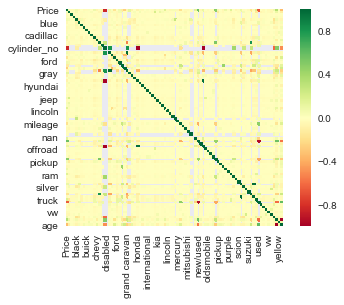

In [62]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

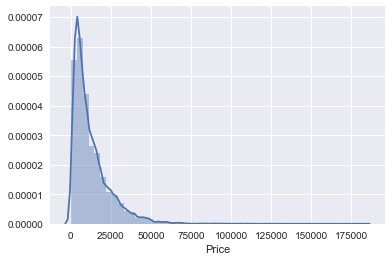

In [63]:
import seaborn as sns
sns.distplot(df['Price'])

Prices are highly skewed

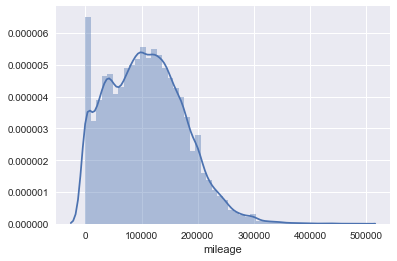

In [64]:
import seaborn as sns
df.sort_values('mileage', inplace = True, ascending=False)
df['mileage'].head(5)
df = df[(df['mileage'] < 500000)]
sns.distplot(df['mileage'])

Text(0,0.5,'Price ($)')

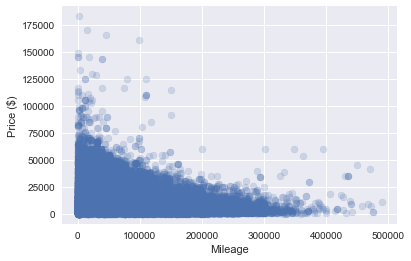

In [65]:
plt.scatter(df['mileage'], df['Price'], alpha=.2)
plt.xlabel("Mileage")
plt.ylabel("Price ($)")

In [68]:
# Start with a simple model

X=df.loc[:,['mileage','age']]

y=df['Price']

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39376 entries, https://chico.craigslist.org/cto/d/2005-ford-f350/6474038382.html to https://tucson.craigslist.org/ctd/d/2002-chevrolet-silverado-1500/6474978357.html
Data columns (total 2 columns):
mileage    39376 non-null float64
age        39374 non-null float64
dtypes: float64(2)
memory usage: 2.2+ MB


In [70]:
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [71]:
X_train.columns

Index(['mileage', 'age'], dtype='object')

## Base Model

In [72]:
# First let us fit only on mileage
selected_columns_1 = ['mileage']

In [73]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train.loc[:,selected_columns_1],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
lr_model1.coef_, lr_model1.intercept_

(array([-0.08223139]), 21454.180867528627)

Text(0,0.5,'Price ($)')

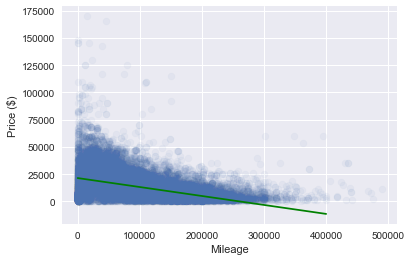

In [75]:
plt.scatter(X_train['mileage'],y_train,alpha=.05)
vec1 = np.linspace(0,400000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1, color='g')
plt.xlabel("Mileage")
plt.ylabel("Price ($)")

In [76]:
### Get the predictions on the training set
train_set_pred1 = lr_model1.predict(X_train.loc[:,selected_columns_1])

In [77]:
### Get the predictions on the test set
test_set_pred1 = lr_model1.predict(X_test.loc[:,selected_columns_1])

Text(0,0.5,'Price ($)')

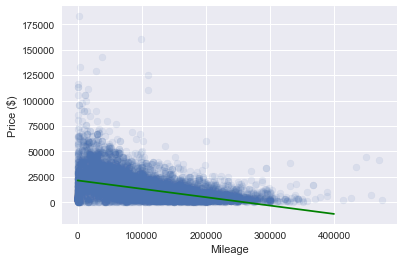

In [78]:
### Plot the regression line on top of the data

plt.scatter(X_test['mileage'],y_test,alpha=.1)
vec1 = np.linspace(0,400000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1, color = 'green')
plt.xlabel("Mileage")
plt.ylabel("Price ($)")

Text(0.5,1,'Model 1: Just Mileage')

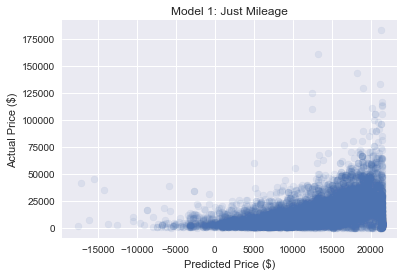

In [79]:
## Plot predicted vs actual 

plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.plot(np.linspace(0,20000,100),np.linspace(0,20000,100))
plt.xlabel("Predicted Price ($)")
plt.ylabel("Actual Price ($)")
plt.title("Model 1: Just Mileage")

Text(0,0.5,'Residuals')

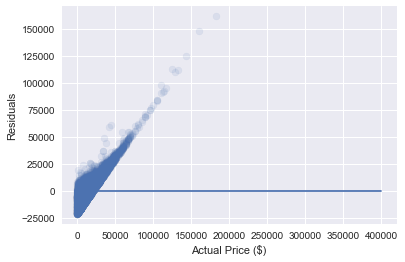

In [80]:
## Residual Plot
## Plot predicted vs actual 

plt.scatter(y_test,y_test-test_set_pred1,alpha=.1)
plt.plot(np.linspace(0,400000,1000),np.linspace(0,0,1000))
plt.xlabel("Actual Price ($)")
plt.ylabel("Residuals")

In [81]:
# How good is our model on the test set?

# Root Mean Square Error
print("RMSE:", np.sqrt(np.mean((test_set_pred1 - y_test)**2)))
df['Price'].mean()

RMSE: 10953.729112124915


12590.463607273467

In [82]:
# Mean Absolute Deviation
(np.mean(np.abs(test_set_pred1 - y_test)))

7385.829444126161

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [84]:
np.sqrt(mean_squared_error(y_test, test_set_pred1)), mean_absolute_error(y_test,test_set_pred1)

(10953.72911212494, 7385.829444126161)

## Multiple Linear Regression

In [ ]:
selected_col = ['Price', 'age','mileage']
selected_col.extend(list(condition_dummies))
selected_col.extend(list(type_dummies))
selected_col = [e for e in selected_col if e not in ('salvage', 'convertible', 'coupe', 'hatchback', 'sedan')]
print(selected_col)
df_2 = df[selected_col]
df_2.info()

In [ ]:
df_2.dropna(axis=0, how='any', inplace = True)
df_2.info()
X=df_2.loc[:,['age', 'mileage', 'excellent', 'fair', 'good', 'like_new', 'new', 'SUV', 'bus', 'mini-van', 'offroad', 'other', 'pickup', 'truck', 'van', 'wagon']]
y=df_2['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train,y_train)

In [ ]:
lr_model2.coef_

In [ ]:
lr_model2.intercept_

In [ ]:
list(zip(selected_col,lr_model2.coef_))

In [ ]:
X.corr()

In [ ]:
test_set_pred2 = lr_model2.predict(X_test)

In [ ]:
plt.scatter(test_set_pred2,y_test,alpha=.1)
plt.plot(np.linspace(0,100000,1000),np.linspace(0,100000,1000),color = 'green')
plt.xlabel("Predicted Price ($)")
plt.ylabel("Actual Price ($)")
plt.title("Condition and Type of Vehicle Model")

In [ ]:
plt.scatter(y_test, y_test-test_set_pred2,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel("Actual Price ($)")
plt.ylabel("Residuals")
plt.title("Model 2: Residual Plot")

In [ ]:
#RMSE
np.sqrt(np.mean((test_set_pred2 - y_test)**2))

In [ ]:
#MAD
(np.mean(np.abs(test_set_pred2 - y_test)))

** Next, let us try using all of the variables (in the reduced selection) **

In [ ]:
selected_col.extend(list(paint_dummies))
selected_col.extend(list(brand_dummies))

print(selected_col)
df_3 = df[selected_col]
df_3.info()

In [ ]:
df_3.dropna(axis=0, how='any', inplace = True)
df_3.info()
X=df_3.loc[:, ~df_3.columns.isin(['Price','Price_log'])]
y=df_3['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train,y_train)

In [ ]:
list(zip(X_train.columns,lr_model3.coef_))

In [ ]:
test_set_pred3 = lr_model3.predict(X_test)

In [ ]:
plt.scatter(test_set_pred3,y_test,alpha=.1)
plt.plot(np.linspace(0,40000,1000),np.linspace(0,40000,1000), color='green')
plt.xlabel("Predicted Price ($)")
plt.ylabel("Actual Price ($)")
plt.title("Model 3: Condition, type, paint color and brand dummies")

In [ ]:
plt.scatter(y_test,y_test-test_set_pred3,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel("Actual Price ($)")
plt.ylabel("Residuals")
plt.title("Model 3: Residual Plot")

In [ ]:
#RMSE
np.sqrt(np.mean((test_set_pred3 - y_test)**2))

In [ ]:
#MAD
(np.mean(np.abs(test_set_pred3 - y_test)))

In [ ]:
print(list(X))

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()

results.summary()

In [ ]:
df['Price_log'] = df['Price'].apply(lambda x: math.log(x,10))
print(df['Price_log'].head())
price_log = ['Price_log']
selected_col.extend(price_log)
print(selected_col)

In [ ]:
df_4 = df[selected_col]

In [ ]:
df_4.dropna(axis=0, how='any', inplace = True)
df_4.info()
X=df_4.loc[:, ~df_4.columns.isin(['Price', 'Price_log'])]
y=df_4['Price_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
lr_model4 = LinearRegression()
lr_model4.fit(X_train,y_train)

In [ ]:
list(zip(X_train.columns,lr_model4.coef_))

In [ ]:
test_set_pred4 = lr_model4.predict(X_test)

In [ ]:
plt.scatter(test_set_pred4,y_test,alpha=.1)
plt.plot(np.linspace(0,20,2),np.linspace(0,20,2), color='green')
plt.xlabel("Predicted log Price ($)")
plt.ylabel("Actual log Price ($)")
plt.title("Model 4: Condition, type, paint color and brand dummies to predict log Price")

In [ ]:
plt.scatter(y_test,y_test-test_set_pred4,alpha=.1)
plt.plot(np.linspace(0,20,2),np.linspace(0,0,2))
plt.xlabel("Actual log Price ($)")
plt.ylabel("Residuals")
plt.title("Model 4: Residual Plot")

In [ ]:
np.sqrt(np.mean((test_set_pred4 - y_test)**2))

### Adding squared terms


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

poly = PolynomialFeatures(degree=2)
lm = LinearRegression()
lm.fit(poly.fit_transform(X_train), y_train)
print('OLS regression with polnomial terms val R^2: %.3f' % lm.score(poly.transform(X_test), y_test))
print('OLS regression with polynomial terms val RMSE: %.3f' 
      % RMSE(lm.predict(poly.fit_transform(X_test)), y_test))

** Regularisation **

In [ ]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_tr = std.fit_transform(poly.fit_transform(X_train))
X_te = std.transform(poly.transform(X_test))

In [ ]:
lr_model5 = Lasso(alpha = 100)
lr_model5.fit(X_tr,y_train)

In [ ]:
# Useful way to look at the coefficients
# Lots of 0s
# Easy to interpret, feature space is simplier, you don't have to choose yourself
list(zip(pd.DataFrame(X_tr).columns,lr_model5.coef_))

In [ ]:
test_set_pred5 = lr_model5.predict(X_te)

In [ ]:
print(len(test_set_pred5))
len(y_test)

In [ ]:
plt.scatter(test_set_pred5,y_test,alpha=.1)
plt.plot(np.linspace(0,20000,100),np.linspace(0,20000,100))
plt.xlabel("Predicted Price ($)")
plt.ylabel("Actual Price ($)")
plt.title("Model 5: Polynomials with Standardisation and Regularisation")

In [ ]:
#RMSE
np.sqrt(np.mean((test_set_pred5 - y_test)**2))

## Finding the "best" value of lambda (alpha) with a single train/test split

In [ ]:
alphalist = 10**(np.linspace(-2,2,20))
err_vec_test = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), ('lasso', Lasso(alpha = curr_alpha))]
#    steps = [('standardize', StandardScaler()), ('ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)    
    pipe.fit(poly.fit_transform(X_train), y_train)
    test_set_pred7 = pipe.predict(poly.transform(X_test))
    err_vec_test[i] = np.sqrt(np.mean((test_set_pred7 - y_test)**2))

    train_set_pred7 = pipe.predict(poly.fit_transform(X_train))
    err_vec_train[i] = np.sqrt(np.mean((train_set_pred7 - y_train)**2))

In [ ]:
# Find the minimum of the bias (it's 0 here which suggests that we don't want 
# regularisation and we need to make the model more complex)
np.argmin(err_vec_test)

In [ ]:
#plot the curves of both the training error and test error as alpha changes

plt.plot(np.log10(alphalist),err_vec_test)
plt.plot(np.log10(alphalist),err_vec_train)
plt.title('Test vs Training Error')
plt.ylabel('RMSE (Price ($))')
plt.xlabel('Lambda')
# Looped through potential regularisation strengths and plot green as training error and 
# Blue as test error
# This graph would suggest that regularisation isn't required as the error doesn't improve
# when increasing the regularisation, and then it gets worse
# You'd want to make the model more complex instead. 


In [ ]:
## This is the minimum error achieved on the test set across the different alpha values we tried
np.min(err_vec_test)